<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/exercises/Practica4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### __Data set de vinos del mundo__

Esta es una versión reducida de la base de datos [winemag-data](https://gist.github.com/clairehq/79acab35be50eaf1c383948ed3fd1129), que contiene una reseña en inglés sobre una gran cantidad de vinos del mundo.

### __Descripción de los campos__

 - **country**: El país de donde proviene el vino
 - **description** : Algunas frases de un sommelier que describen el sabor, olor, apariencia, sensación, etc. del vino.
 - **designation**: La denominación. El viñedo dentro de la bodega de donde proceden las uvas que elaboraron el vino.
 - **points**: la cantidad de puntos que WineEnthusiast calificó al vino en una escala del 1 al 100 (aunque dicen que solo publican reseñas de vinos con una puntuación> = 80).
 - **price**: El costo de una botella de vino.
 - **province**: La provincia o estado de donde proviene el vino
 - **region_1**: el área de cultivo de vino en una provincia o estado (es decir, Napa)
 - **region_2**: a veces hay regiones más específicas, especificadas dentro de un área de cultivo del vino (es decir, Rutherford dentro del Valle de Napa), pero este valor a veces puede estar en blanco.
 - **taster_name**: nombre de la persona que probó y revisó el vino.
 - **taster_twitter_handle**: identificador de Twitter para la persona que probó y revisó el vino.
 - **title**: el título de la reseña de vinos, que a menudo contiene la cosecha si está interesado en extraer esa característica.
 - **variety**: la variedad: el tipo de uva utilizada para elaborar el vino (es decir, Pinot Noir).
 - **winery**: la bodega que hizo el vino.

### TEST

In [2]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/winemag-data-less.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.2M  100 23.2M    0     0  14.6M      0  0:00:01  0:00:01 --:--:-- 14.6M


In [3]:
# leemos el dataframe usando read_csv
df = pd.read_csv("winemag-data-less.csv")
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59995 entries, 0 to 59994
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             59995 non-null  int64  
 1   country                59964 non-null  object 
 2   description            59995 non-null  object 
 3   designation            42728 non-null  object 
 4   points                 59995 non-null  int64  
 5   price                  55750 non-null  float64
 6   province               59964 non-null  object 
 7   region_1               50163 non-null  object 
 8   region_2               23068 non-null  object 
 9   taster_name            47586 non-null  object 
 10  taster_twitter_handle  45381 non-null  object 
 11  title                  59995 non-null  object 
 12  variety                59995 non-null  object 
 13  winery                 59995 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 6.4+

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [4]:
#Tiremos la columna Unnamed
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


### __Veamos cuantas reseñas de vinos mexicanos tenemos.__

#### &#9758; Construye una nueva Tabla con las reseñas de vinos mexicanos.
- Quédate **sólo** con las siguientes columnas: `['country','winery','variety','description','points','price']`
- Haz que el índice se reinicie en 0.
- Guarda este DataFrame en la variable vinosMX.

In [5]:
"""
SECUENCIA:
1. Ubicar todos los registros de México usando indexación booleana
2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
3. Reiniciar el índice usando reset_index()
4. Tirar (drop) la nueva columna index
5. Asignar el resultado de este proceso a la variable vinosMX
"""
# TU CODIGO
# 1. Ubicar todos los registros de México usando indexación booleana
vinosMX = df[df['country']=='Mexico']

# 2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
vinosMX = vinosMX[['country','winery','variety','description','points','price']]

# 3. Reiniciar el índice usando reset_index()
vinosMX = vinosMX.reset_index()

# 4. Tirar (drop) la nueva columna index
vinosMX = vinosMX.drop('index',axis=1)
vinosMX[:3]

,country,winery,variety,description,points,price
0,Mexico,L.A. Cetto,Nebbiolo,"The color is appropriately light, the aromas a...",88,18.0
1,Mexico,Monte Xanic,Sauvignon Blanc,"Sauvignon Blanc is, in general, one of Baja's ...",87,15.0
2,Mexico,L.A. Cetto,Cabernet Sauvignon,"Aromas of mature Cabernet: cassis, tobacco lea...",87,18.0


### __Veamos cuantas reseñas de vinos por país tenemos.__

#### &#9758; Muestra en una gráfica de barras la distribución del número de reseñas por país (_top 10_).

#### Puedes auxiliarte con alguna de estos métodos de Pandas:
 - [pandas.DataFrame.count](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html)
 - [pandas.Series.value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
 - [pandas.Series.index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.index.html)
 - [pandas.Series.values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.values.html)

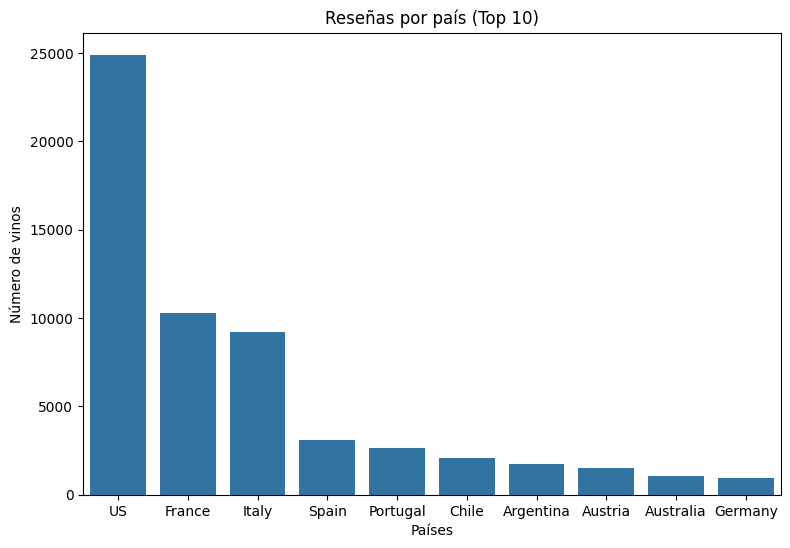

In [6]:
"""
SECUENCIA:
1. Ubicar el nombre de la columna de país
2. Sobre esta columna, obtener la Serie correspondiente
3. Hacer un conteo de los valores únicos sobre esta Serie

4. X en la gráfica de barras son los países (índice de la Serie)
5. Y en la gráfica de barras son los conteos por país (values de la Serie)
6. Usar Seaborn para graficar el diagrama de barras
7. Rotular la gráfica y los ejes
"""
# 1. Ubicar el nombre de la columna de país
# 2. Sobre esta columna, obtener la Serie correspondiente
# 3. Hacer un conteo de los valores únicos sobre esta Serie
conteos=df.country.value_counts()

# 4. X en la gráfica de barras son los países (índice de la Serie)
# 5. Y en la gráfica de barras son los conteos por país (values de la Serie)
x = conteos.index
y = conteos.values

plt.figure(figsize=(9,6))
sns.barplot(conteos[:10])

# En una sola línea:
#sns.barplot(df.country.value_counts().index[:10], df.country.value_counts().values[:10])

plt.xlabel("Países")
plt.ylabel("Número de vinos")
plt.title("Reseñas por país (Top 10)")

plt.show()

### __Veamos ahora cuál es el precio promedio por cada país.__

#### &#9758; Muestra en una gráfica de barras el precio promedio por país, en orden descendente (_top 10_).

Puedes consultar:
 - [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

#### &#9758; ¿Cuál sería el precio promedio por variedad?

🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

In [7]:
promedios = df[['country', 'price']].groupby('country').mean()
promedios.reset_index()[:3]

,country,price
0,Argentina,23.783112
1,Armenia,14.000000
2,Australia,36.512381


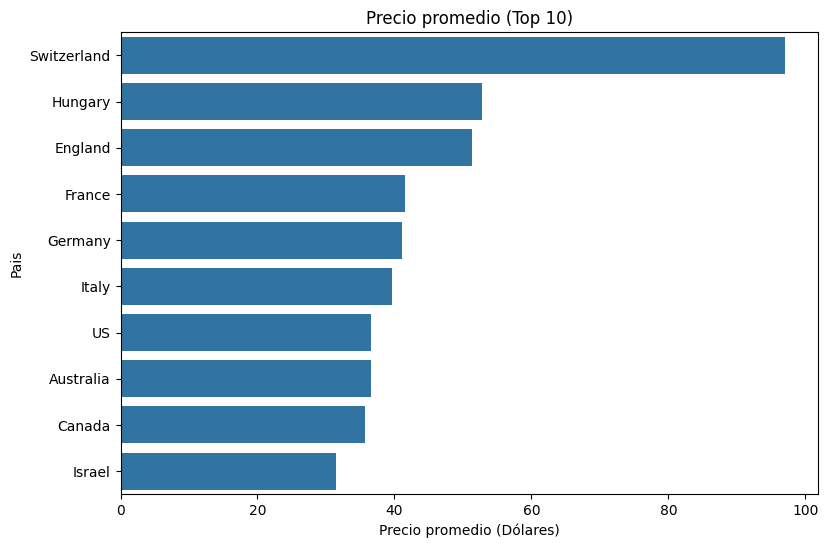

In [8]:
"""
SECUENCIA:

"""
promedios = df[['country', 'price']].groupby('country').mean().sort_values(by='price', ascending=False)

plt.figure(figsize=(9,6))

sns.barplot(promedios['price'][:10], orient='h')

plt.xlabel("Precio promedio (Dólares)")
plt.ylabel("Pais")
plt.title("Precio promedio (Top 10)")

plt.show()

#### Agregando anotaciones a nuestros gráficos

Es posible agregar información a nuestros gráficos, en forma de texto, o dibujos (e.g. flechas, líneas, círculos, etc.). Para ello, se utiliza la anotación (annotate) de ejes (axes). Detallar aquí cómo funciona nos llevaría mucho tiempo. Puedes consultar la documentación en estas ligas:

- [matplotlib.Artist](https://matplotlib.org/3.3.3/api/artist_api.html#matplotlib.artist.Artist)
    - [Artist tutorial](https://matplotlib.org/3.3.3/tutorials/intermediate/artists.html)
- [matplotlib.axes](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Patch](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Rectangle](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html)
- [matplotlib.pyplot.annotate](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.annotate.html)

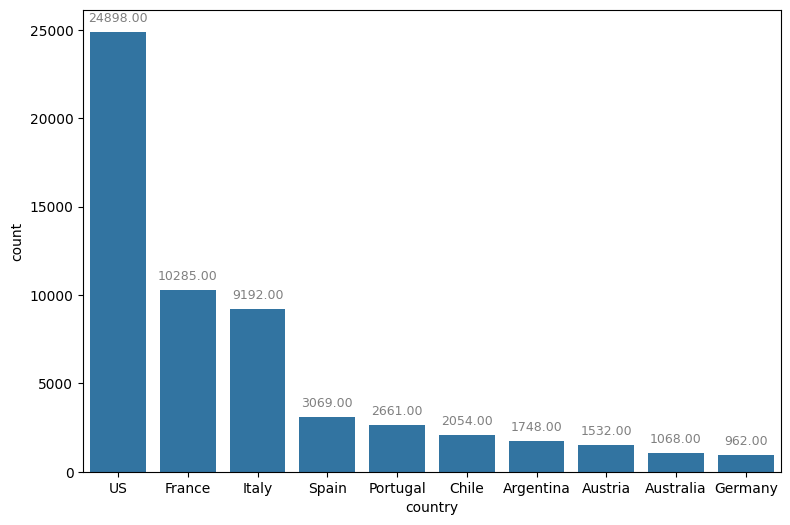

In [9]:
#Definimos el tamaño del canvas
plt.figure(figsize=(9,6))

# la variable "ax" (axes) contiene la información  del gráfico de barras.
# En particular, contiene todo lo relativo a los parches (rectángulos) del barplot.
ax = sns.barplot(conteos[:10])

# Recorremos cada rectángulo
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=9, color='gray',\
                xytext=(0, 10),\
                textcoords='offset points')

plt.show()

### __Ahora queremos darnos una idea de cuáles podrían ser los países cuyos vinos tienen una mejor razón calidad-precio en promedio.__

#### &#9758; Muestra en una gráfica de barras la razón puntos/precio promedio por país, en orden descendente (_top 10_). Muestra los valores de la razón sobre cada barra.

✋ __Recuerda que si divides entre 0 o Nan obtendrás inf o nan__

🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

In [10]:
df_nonaprice= df[~df['price'].isna()]
df_nonaprice['calidadPrecio'] = df_nonaprice['points'] / df_nonaprice['price']
df_nonaprice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55750 entries, 1 to 59994
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                55723 non-null  object 
 1   description            55750 non-null  object 
 2   designation            39741 non-null  object 
 3   points                 55750 non-null  int64  
 4   price                  55750 non-null  float64
 5   province               55723 non-null  object 
 6   region_1               46742 non-null  object 
 7   region_2               22970 non-null  object 
 8   taster_name            44191 non-null  object 
 9   taster_twitter_handle  42008 non-null  object 
 10  title                  55750 non-null  object 
 11  variety                55750 non-null  object 
 12  winery                 55750 non-null  object 
 13  calidadPrecio          55750 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 6.4+ MB


<ipython-input-10-b2b9d41ee06c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonaprice['calidadPrecio'] = df_nonaprice['points'] / df_nonaprice['price']


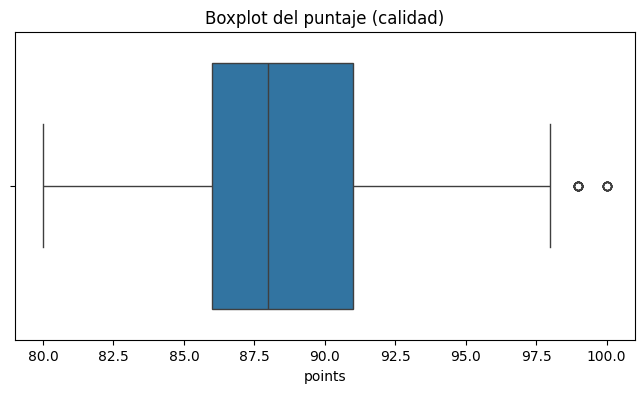

In [11]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['points'])
plt.title("Boxplot del puntaje (calidad)")
plt.show()

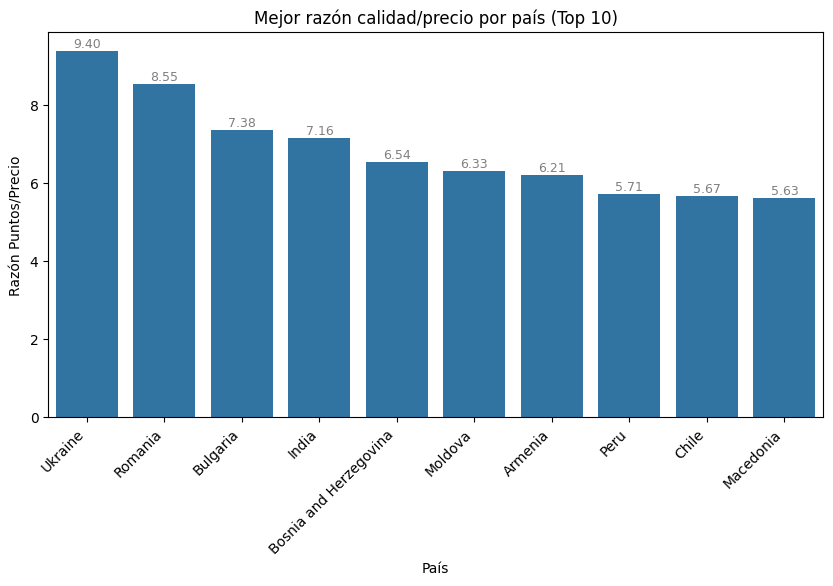

In [12]:
"""
SECUENCIA:

"""
plt.figure(figsize=(10,5))

### TU CODIGO AQUI ##
promedios = df_nonaprice[['country', 'calidadPrecio']].groupby('country').mean().sort_values(by='calidadPrecio', ascending=False)
ax = sns.barplot(promedios['calidadPrecio'][:10])
#####################

plt.title("Mejor razón calidad/precio por país (Top 10)")
plt.xlabel("País")
plt.xticks(rotation= 45, ha="right")
plt.ylabel("Razón Puntos/Precio")

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=9, color='gray', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

### __¿Qué vinos tienen la mejor puntuación y a qué países pertenecen?__

#### &#9758; Muestra en una gráfica de pastel la proporción de los países que tienen los 20 mejores vinos; es decir, los primeros 20 de mayor puntaje.  

<Axes: ylabel='count'>

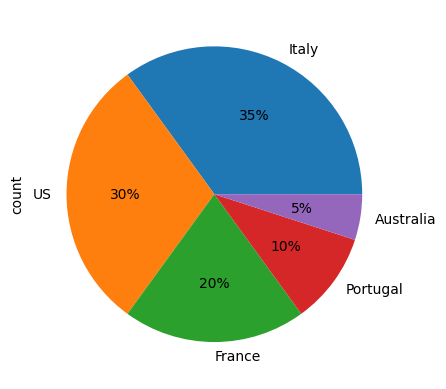

In [13]:
#TU CODIGO
top10wines = df[['country', 'points']].sort_values(by='points', ascending=False)[:20]
top10wines_prop = top10wines['country'].value_counts()
top10wines_prop.plot(kind='pie', y=top10wines.values, autopct='%1.0f%%',legend=False)

### __¿Cuáles son las 10 variedades de uva más abundantes y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

<Axes: ylabel='variety'>

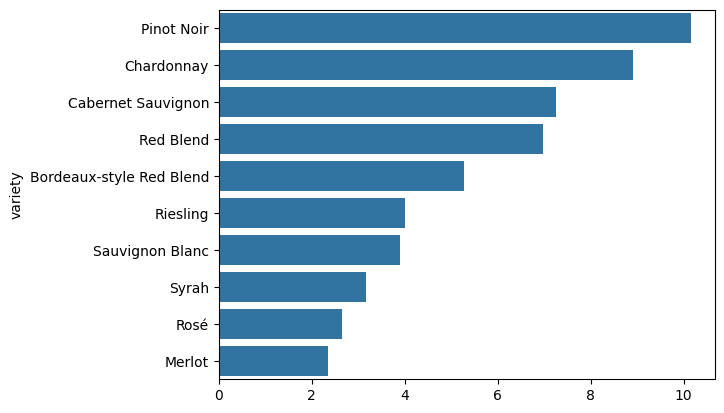

In [14]:
#TU CODIGO

variedades = (df['variety'].value_counts(normalize=True) * 100)[:10]
sns.barplot(y=variedades.index, x=variedades.values, orient='h')

### __¿Cuáles son las 20 bodegas más mencionadas y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

<Axes: ylabel='winery'>

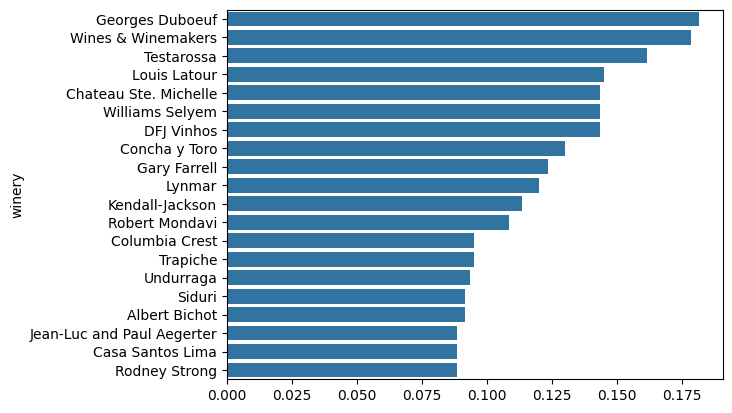

In [15]:
#TU CODIGO
bodegas = (df['winery'].value_counts(normalize=True) * 100)[:20] #.reset_index().rename(columns={'index': 'winery', 'winery': 'pct'}).set_index('winery')
sns.barplot(y=bodegas.index, x=bodegas.values, orient='h')

### __Vamos ahora a construir una nueva tabla de información__

#### &#9758; Construye una tabla que muestre país, variedad de uva, bodega, y valores de puntuación y precio.
- Considera las 10 variedades de uva y las 20 bodegas más importantes.
- Haz una tabla con estos datos y sólo los valores de país, bodega, variedad, puntuación y precio correspondientes.
- Agrega una columna con el valor de puntos/precio
- Cambia el nombre de la bodega para que éste incluya su país de origen.
- Ordena los datos por nombre de país, variedad y bodega (orden ascendente).

In [16]:
#TU CODIGO
# el vino pertenece a las 10 variedaddes mas importantes y las 20 bodegas mas importantes (and)
p_v = df[['country', 'variety', 'winery', 'points', 'price']][df['winery'].isin(bodegas.index) & df['variety'].isin(variedades.index)]
p_v['puntos/precio'] = p_v['points'] / p_v['price']
p_v['winery'] = p_v['country'] + ' - ' + p_v['winery']
p_v.sort_values(by=['country', 'variety', 'winery'], ascending=[True, True,True])

,country,variety,winery,points,price,puntos/precio
2141,Argentina,Cabernet Sauvignon,Argentina - Trapiche,84,10.0,8.400000
3056,Argentina,Cabernet Sauvignon,Argentina - Trapiche,88,15.0,5.866667
15948,Argentina,Cabernet Sauvignon,Argentina - Trapiche,90,15.0,6.000000
24370,Argentina,Cabernet Sauvignon,Argentina - Trapiche,88,10.0,8.800000
30928,Argentina,Cabernet Sauvignon,Argentina - Trapiche,91,30.0,3.033333
...,...,...,...,...,...,...
235,US,Syrah,US - Testarossa,85,49.0,1.734694
21415,US,Syrah,US - Testarossa,91,54.0,1.685185
37366,US,Syrah,US - Testarossa,94,54.0,1.740741
54756,US,Syrah,US - Testarossa,94,54.0,1.740741


#### &#9758; Observa la relación puntos-precio por país

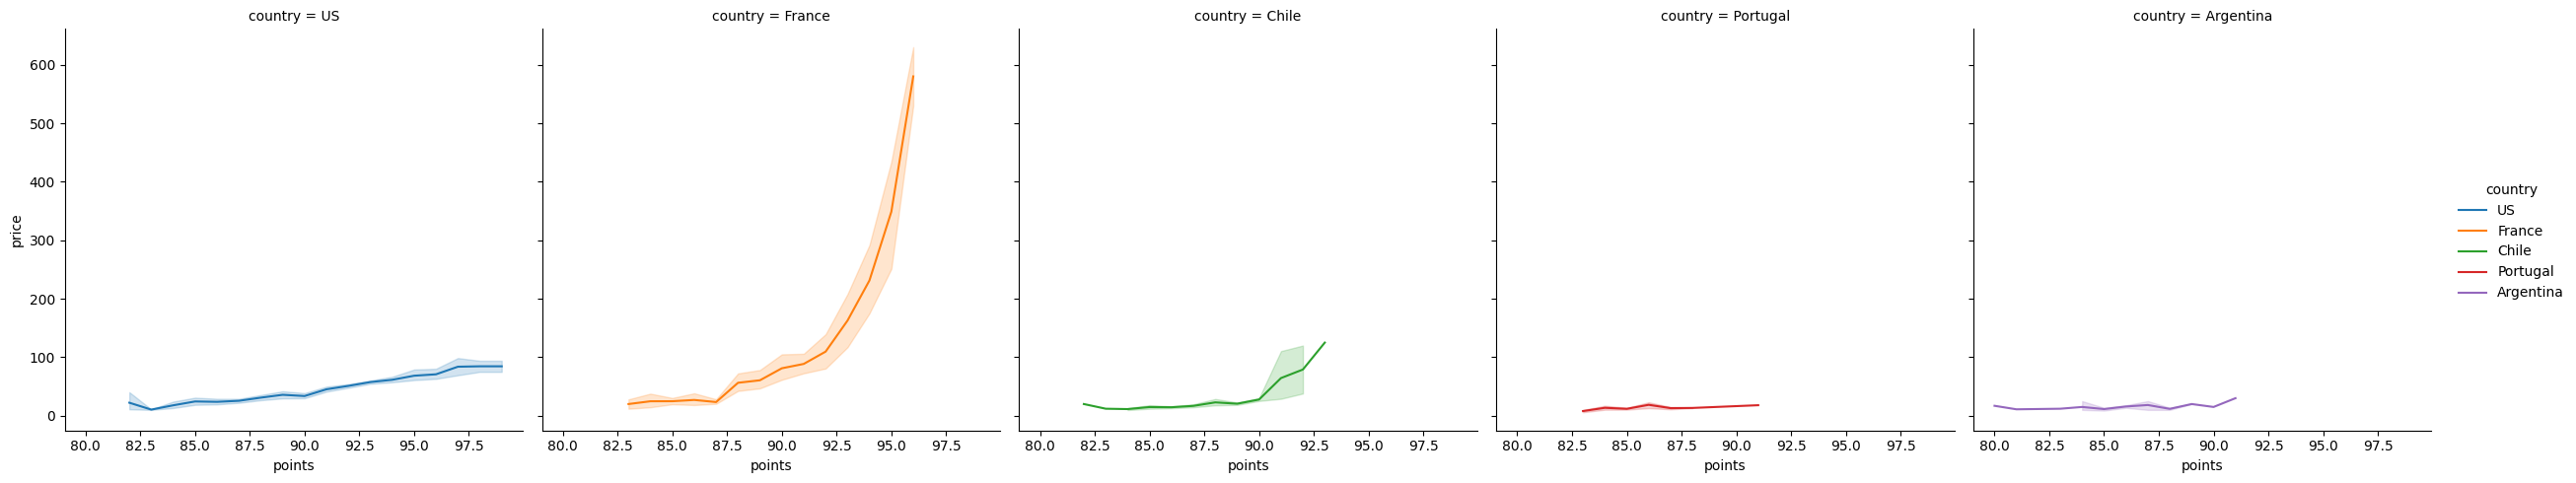

In [17]:
sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=p_v)

#### &#9758; Observa las distribuciones por pares en función de la variedad de uva.

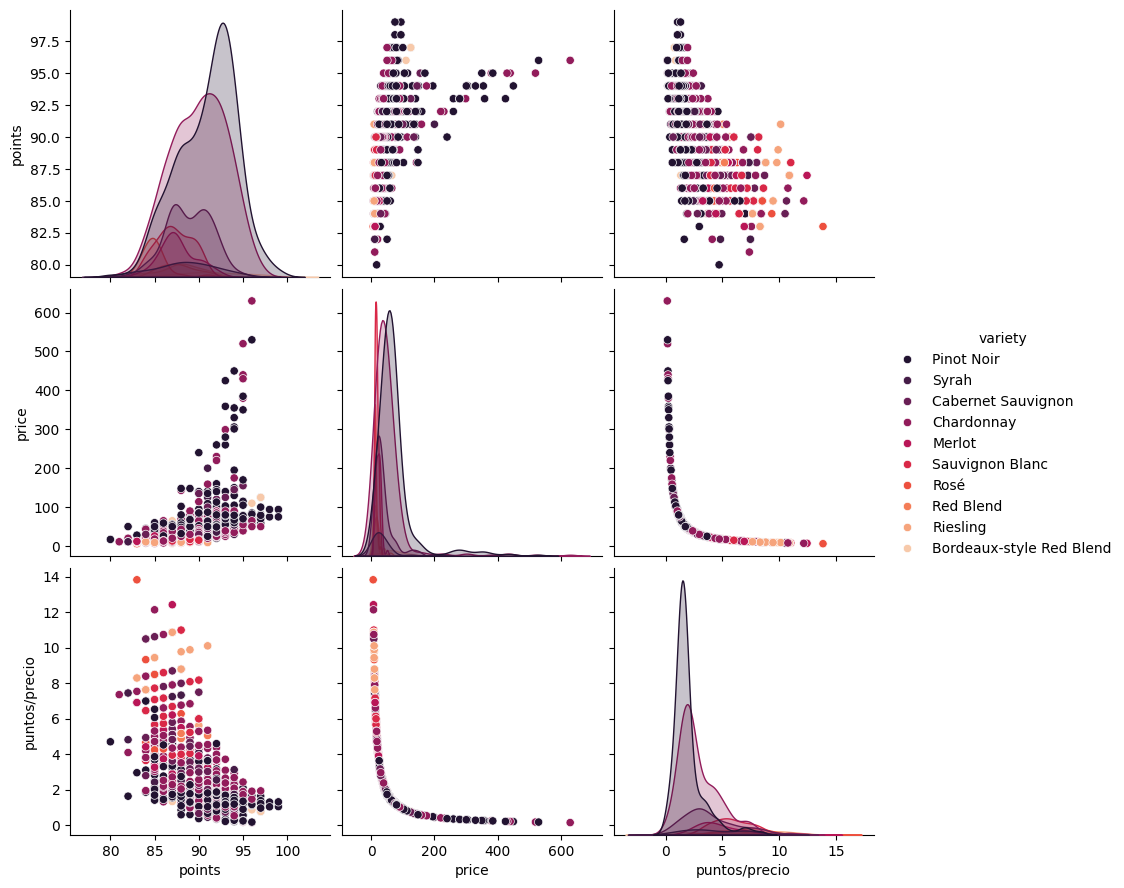

In [18]:
sns.pairplot(p_v, hue="variety",height=3,palette='rocket')

#### &#9758; Observa las distribuciones por pares en función del país.

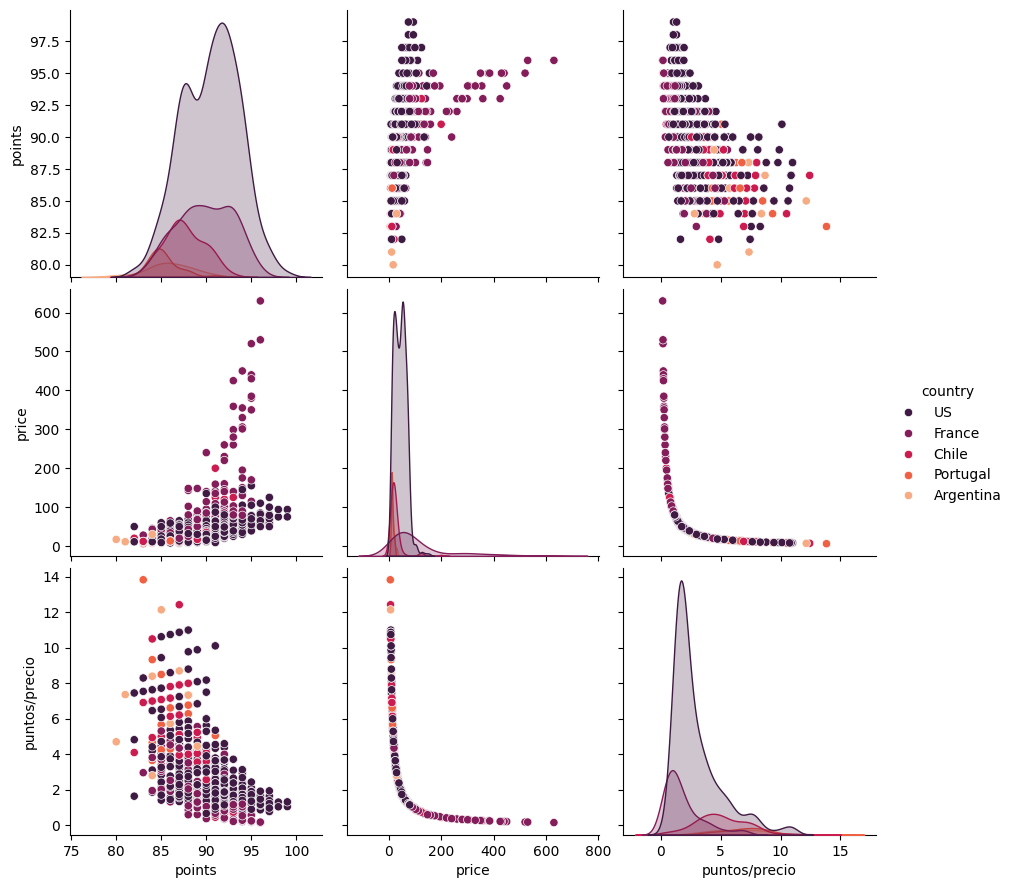

In [19]:
sns.pairplot(p_v, hue="country",height=3,palette='rocket')


#### &#9758; Observa las distribuciones por pares en función de la bodega.

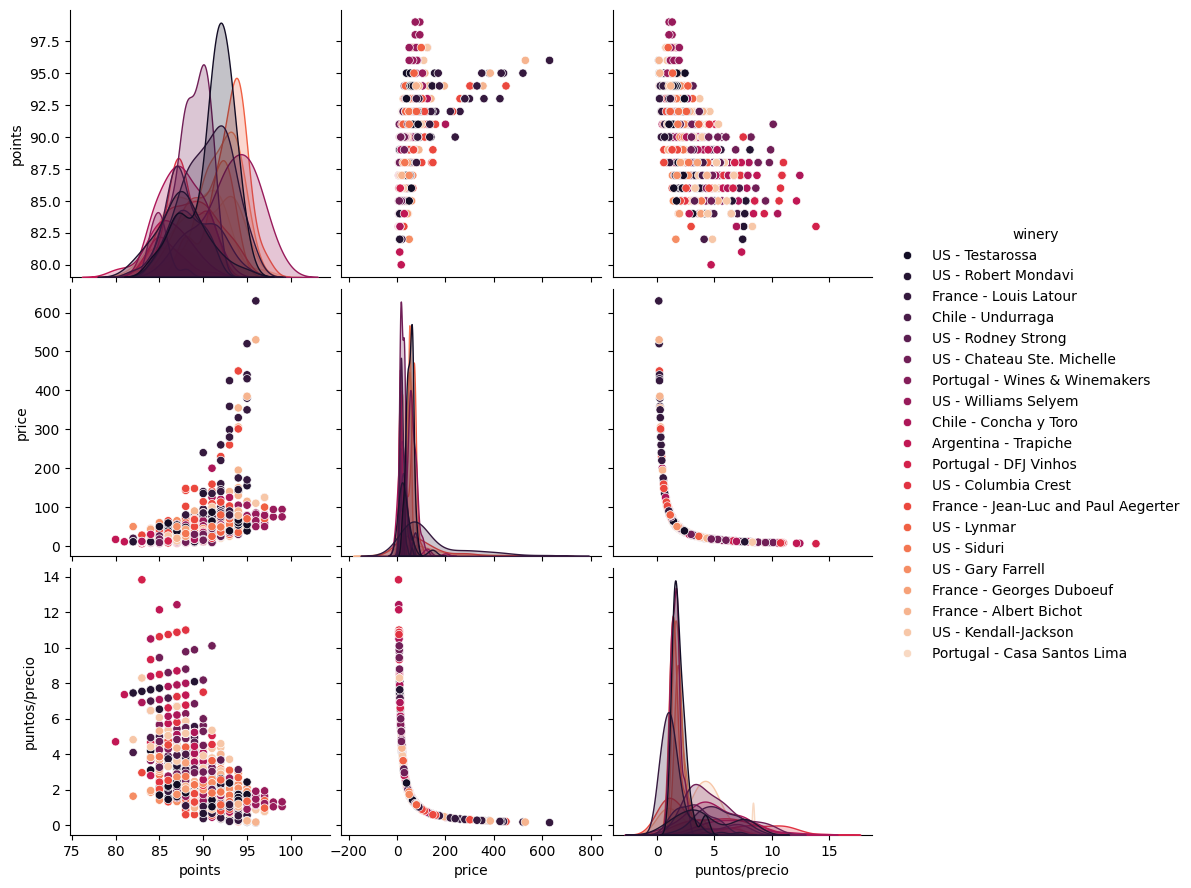

In [20]:
sns.pairplot(p_v, hue="winery",height=3,palette='rocket')


#### &#9758; Observa las distribuciones (scatter) de precio por variedad de uva.

<Axes: xlabel='price', ylabel='variety'>

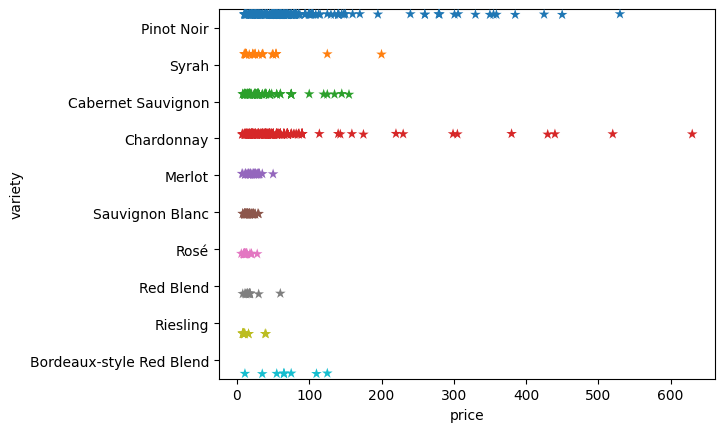

In [21]:
#TU CODIGO
sns.stripplot(y="variety", x="price", data=p_v,dodge=True,hue='variety',marker='*',size=8, legend=False)

#### &#9758; Observa las distribuciones (scatter) de precio por bodega.

<Axes: xlabel='price', ylabel='winery'>

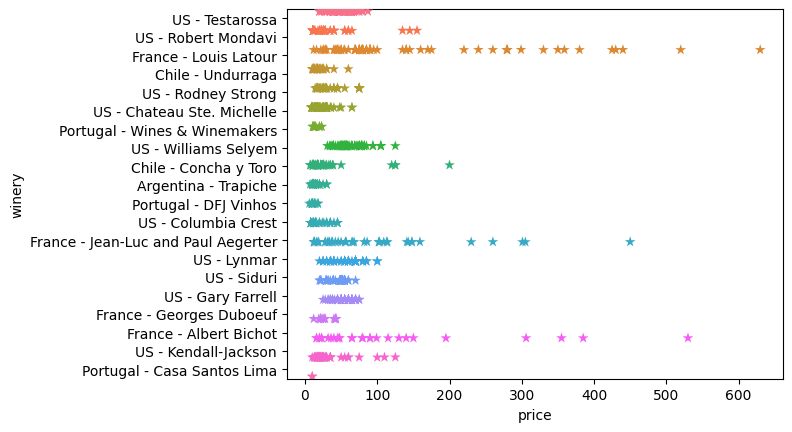

In [22]:
#TU CODIGO
sns.stripplot(y="winery", x="price", data=p_v,dodge=True,hue='winery',marker='*',size=8, legend=False)

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.

<Axes: xlabel='puntos/precio', ylabel='winery'>

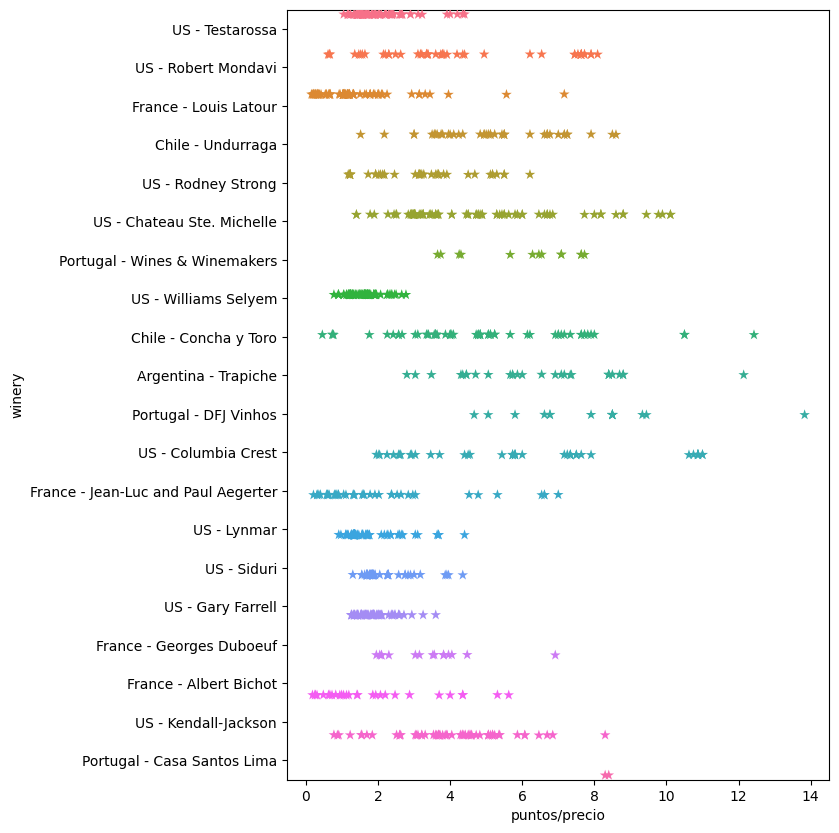

In [23]:
#TU CODIGO
plt.figure(figsize=(7,10))
sns.stripplot(y="winery", x="puntos/precio", data=p_v,dodge=True,hue='winery',marker='*',size=8, legend=False)

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por país.

<Axes: xlabel='puntos/precio', ylabel='country'>

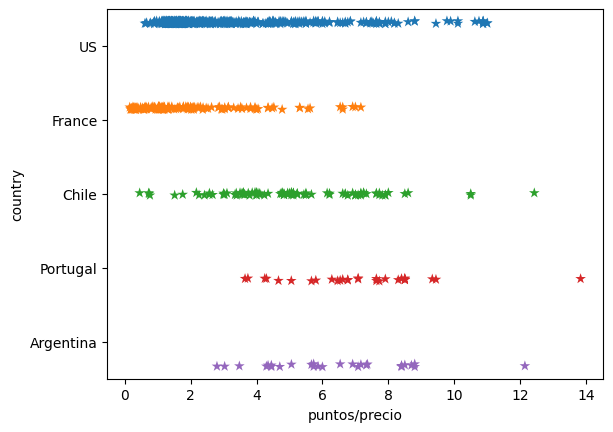

In [24]:
#TU CODIGO
sns.stripplot(y="country", x="puntos/precio", data=p_v,dodge=True,hue='country',marker='*',size=8, legend=False)

### __Agrega los datos de México a esta última tabla de información__

#### &#9758; Une la tabla de vinosMX a la tabla p_v
- Asegúrate de __no agregar__ la columna de descripción

In [25]:
#TU CODIGO
df3 = pd.concat([vinosMX[['country', 'winery', 'variety', 'points', 'price']], p_v])
df3[:3]

,country,winery,variety,points,price,puntos/precio
0,Mexico,L.A. Cetto,Nebbiolo,88,18.0,NaN
1,Mexico,Monte Xanic,Sauvignon Blanc,87,15.0,NaN
2,Mexico,L.A. Cetto,Cabernet Sauvignon,87,18.0,NaN


#### &#9758; Calcula los valores de points/price para los vinos de México
- TIP: Usa el método apply sobre `df3[['points','price','points/price']]`

In [26]:
df3['puntos/precio'] = df3['points'] / df3['price']
df3[:3]

,country,winery,variety,points,price,puntos/precio
0,Mexico,L.A. Cetto,Nebbiolo,88,18.0,4.888889
1,Mexico,Monte Xanic,Sauvignon Blanc,87,15.0,5.800000
2,Mexico,L.A. Cetto,Cabernet Sauvignon,87,18.0,4.833333


#### &#9758; Observa la relación puntos-precio por país

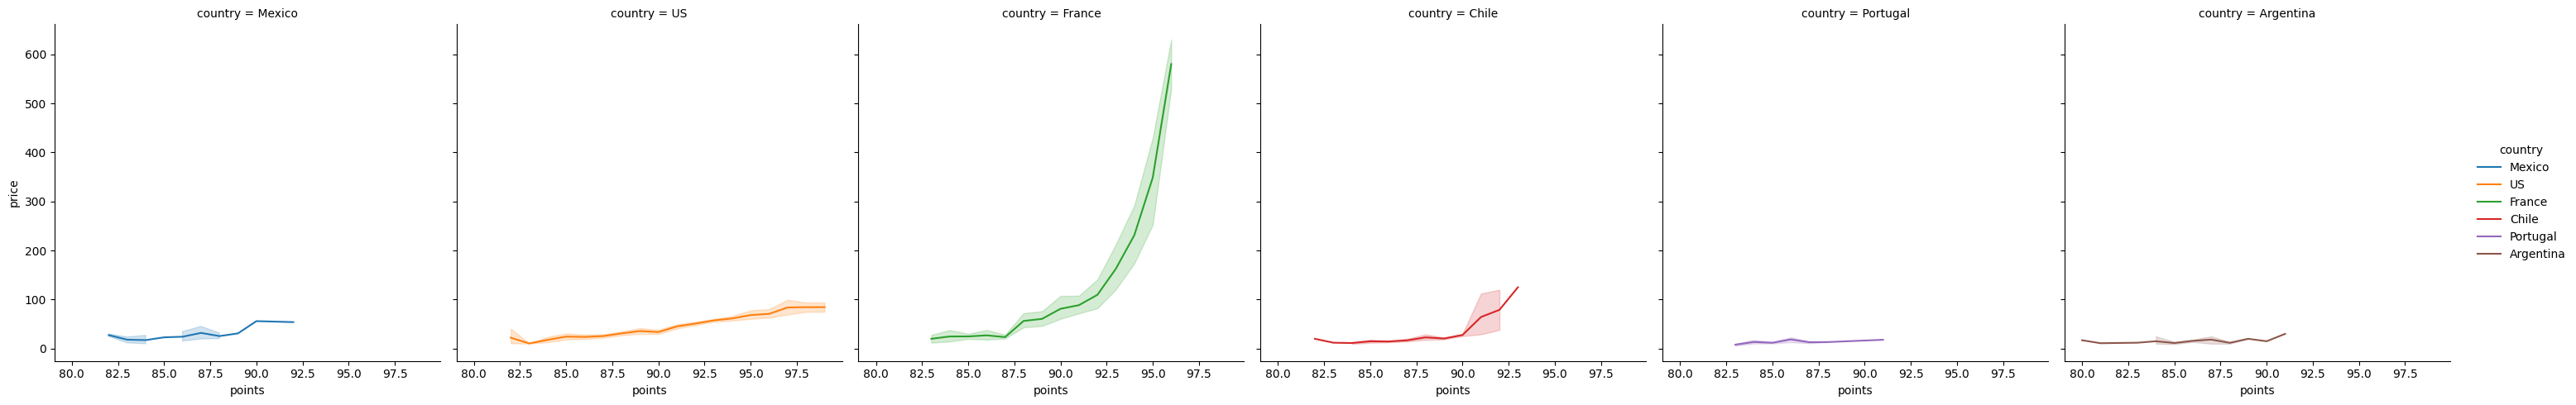

In [27]:
sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=df3)

In [51]:
df3.country.unique()

array(['Mexico', 'US', 'France', 'Chile', 'Portugal', 'Argentina', nan],
      dtype=object)

#### &#9758; Observa las distribuciones por pares en función del país.
- Construye una tabla auxiliar "mx_top", donde los datos de México (en df3) aparezcan al final de la tabla mx_top.

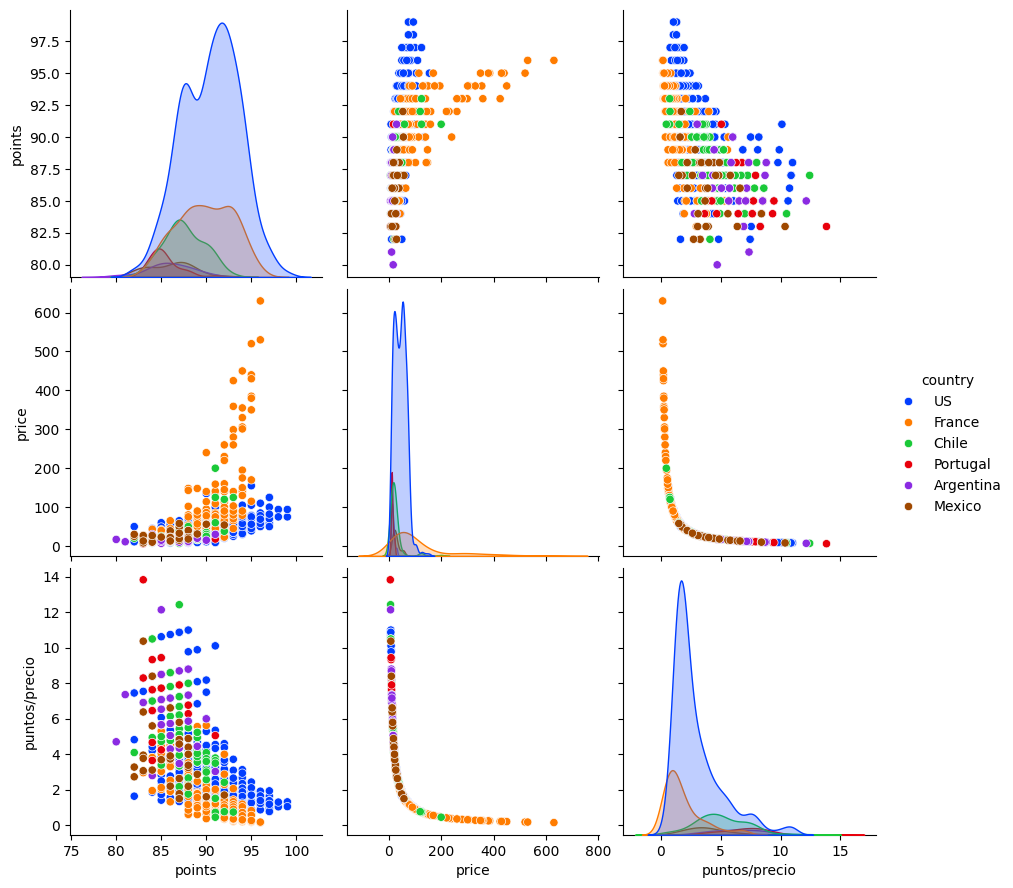

In [58]:
country_categories = ['US', 'France', 'Chile', 'Portugal', 'Argentina', 'Mexico']
df3['country'] = pd.Categorical(df3["country"], categories = country_categories)

mx_top = df3.sort_values(by = "country",na_position='first')
sns.pairplot(mx_top, hue="country",height=3,palette='bright')

#### &#9758; Observa las distribuciones (scatter) de puntos por país.

<ipython-input-36-938834ad27e7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="country", y="points", data=df3,dodge=True,palette='deep',marker='*',size=8)


<Axes: xlabel='country', ylabel='points'>

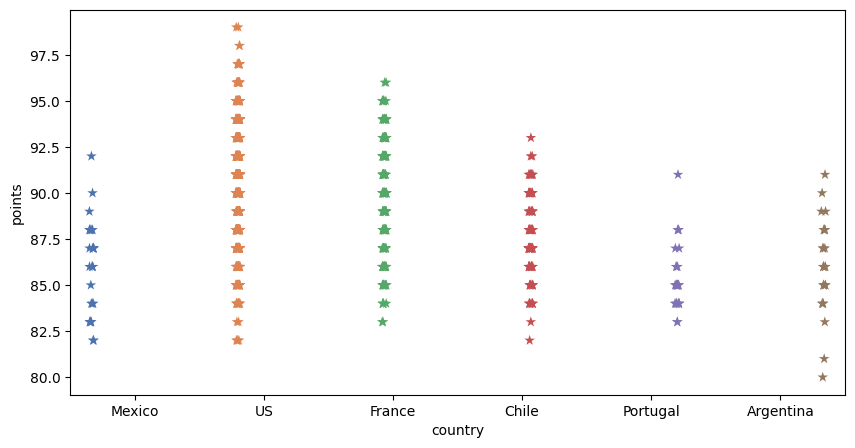

In [36]:
plt.figure(figsize=(10,5))
sns.stripplot(x="country", y="points", data=df3,dodge=True,palette='deep',marker='*',size=8)

#### &#9758; Observa las distribuciones (scatter) de precios por bodega.

<Axes: xlabel='price', ylabel='winery'>

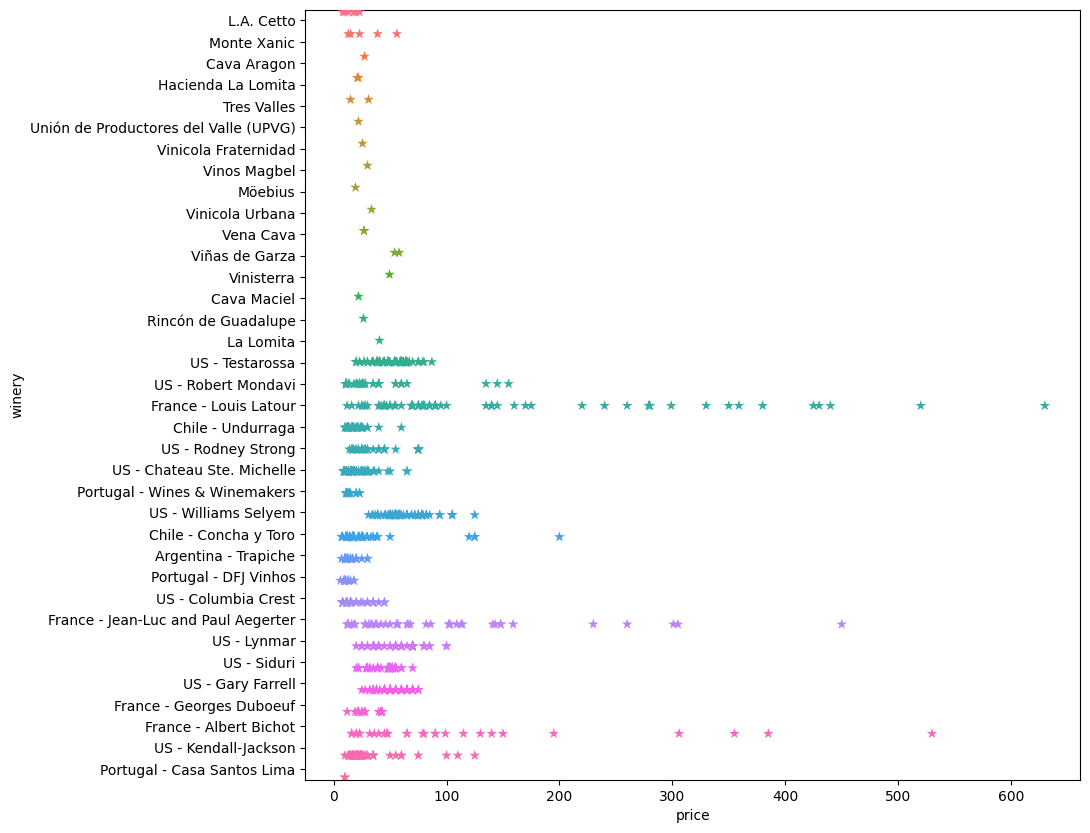

In [37]:
plt.figure(figsize=(10,10))
sns.stripplot(y="winery", x="price", data=df3,dodge=True,hue='winery',marker='*',size=8, legend=False)

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.
- Dibuja una línea que marque el promedio de todos los datos
- Dibuja marcas ubicadando los valores promedio por cada bodega (TIP: usa `groupby` sobre país y bodega para calcular primero los valores promedio)

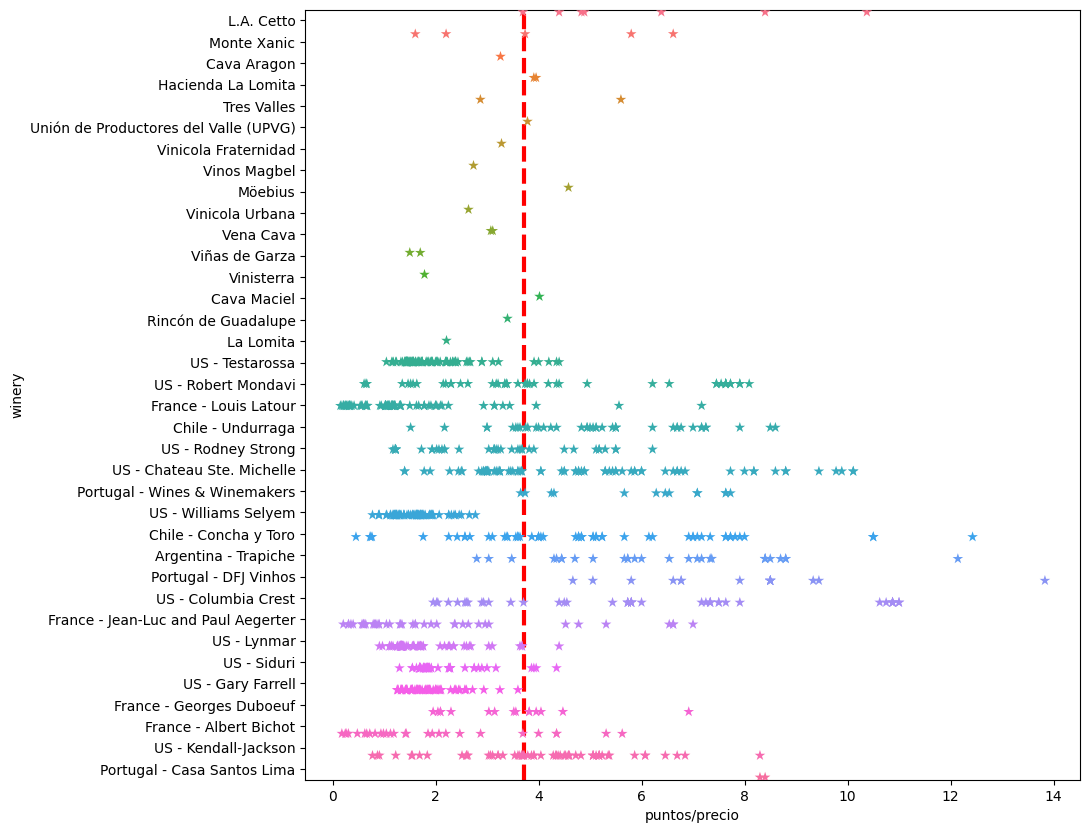

In [33]:
medias = df3[['winery', 'puntos/precio']].groupby('winery').mean()

plt.figure(figsize=(10,10))
sns.stripplot(y="winery", x="puntos/precio", data=df3,dodge=True,hue='winery',marker='*',size=8, legend=False)
plt.axvline(medias['puntos/precio'].mean(), color='red', linestyle='dashed', linewidth=3)
#plt.xticks(rotation= 45, ha="right")


#### &#9758; Si consideramos la proporción de los países con mejor relación puntos/precio, ¿cómo queda México?
- Usa un gráfico de pastel

In [108]:
# TU CODIGO
medias_pais_calidad = df3[['country', 'puntos/precio']].groupby('country').mean().sort_values('puntos/precio', ascending=False)

medias_pais_calidad['mejor_calidad_que_MX'] = medias_pais_calidad['puntos/precio'].apply(lambda x: 'Mejor que MX' if x > medias_pais_calidad.loc['Mexico'].values else 'MX y el resto')

medias_pais_calidad['mejor_calidad_que_MX'].value_counts()

mejor_calidad_que_MX
Mejor que MX     3
MX y el resto    3
Name: count, dtype: int64

<Axes: ylabel='count'>

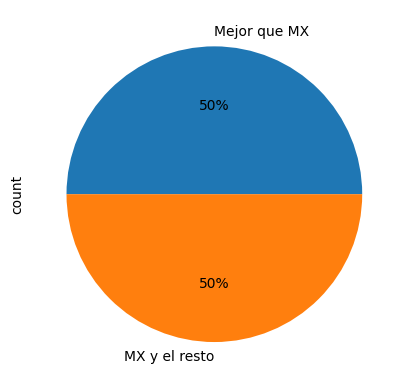

In [110]:
medias_pais_calidad['mejor_calidad_que_MX'].value_counts().plot(kind='pie', y=top10wines.values, autopct='%1.0f%%',legend=False)